Note: The analysis has been done on the Benchmark Data provided on 18th April 2016.

In [24]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import pylab 

# This allows plots to appear directly in the notebook
%matplotlib inline

In [25]:
Cleaned_Data = pd.read_pickle('../Cleaned_Method_Wise_Data_6thMay2016/LinearSVC_cleaned.tsv.gz')
Cleaned_Data.head()

Dataset_Name Method_Name  Test_Score     C   loss penalty  dual  tol
0          tae   LinearSVC    0.578947  0.01  hinge      l2  True  0.1
1          tae   LinearSVC    0.500000  0.01  hinge      l2  True  0.1
2          tae   LinearSVC    0.473684  0.01  hinge      l2  True  0.1
3          tae   LinearSVC    0.500000  0.01  hinge      l2  True  0.1
4          tae   LinearSVC    0.578947  0.01  hinge      l2  True  0.1

In [4]:
Cleaned_Data.shape

(722399, 8)

In [26]:
Cleaned_Data['penalty_categorical'] = Cleaned_Data.penalty.map({'l1':0, 'l2':1})
Cleaned_Data.head()

Dataset_Name Method_Name  Test_Score     C   loss penalty  dual  tol  \
0          tae   LinearSVC    0.578947  0.01  hinge      l2  True  0.1   
1          tae   LinearSVC    0.500000  0.01  hinge      l2  True  0.1   
2          tae   LinearSVC    0.473684  0.01  hinge      l2  True  0.1   
3          tae   LinearSVC    0.500000  0.01  hinge      l2  True  0.1   
4          tae   LinearSVC    0.578947  0.01  hinge      l2  True  0.1   

   penalty_categorical  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1

In [27]:
Cleaned_Data['loss_categorical'] = Cleaned_Data.loss.map({'hinge':0, 'squared_hinge':1})
Cleaned_Data.head()

Dataset_Name Method_Name  Test_Score     C   loss penalty  dual  tol  \
0          tae   LinearSVC    0.578947  0.01  hinge      l2  True  0.1   
1          tae   LinearSVC    0.500000  0.01  hinge      l2  True  0.1   
2          tae   LinearSVC    0.473684  0.01  hinge      l2  True  0.1   
3          tae   LinearSVC    0.500000  0.01  hinge      l2  True  0.1   
4          tae   LinearSVC    0.578947  0.01  hinge      l2  True  0.1   

   penalty_categorical  loss_categorical  
0                    1                 0  
1                    1                 0  
2                    1                 0  
3                    1                 0  
4                    1                 0

# Plot parameters against test scores

In [28]:
Param1=Cleaned_Data['tol'].unique().tolist()
Param1

[0.1, 0.01, 0.001, 0.0001, 1e-05]

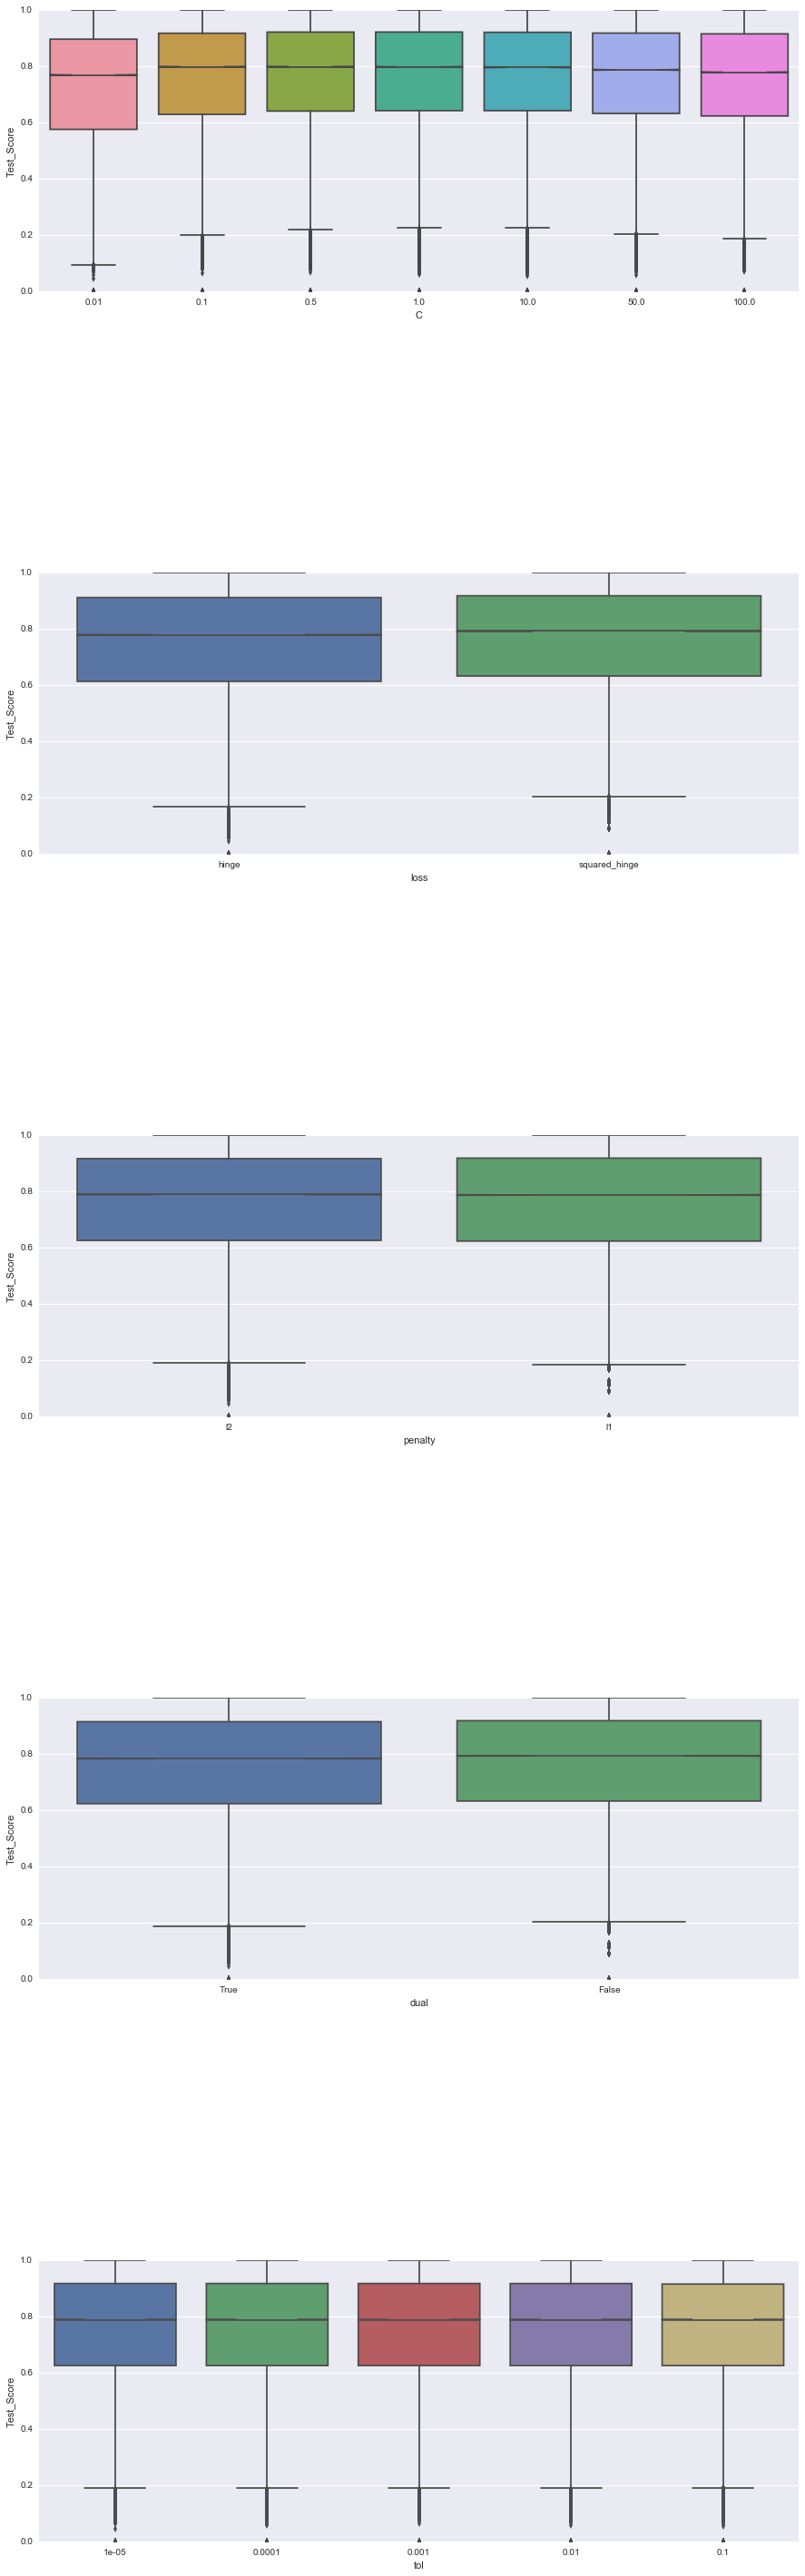

In [29]:
import seaborn as sns
sns.set()
fig, axs = plt.subplots(5,1, sharey=True, figsize=(15,50)) # 3 rows 1 column, figsize controls how big I want the fig to look
fig.subplots_adjust(hspace=1) # Give space between the subplots

#boxplots
sns.boxplot(data=Cleaned_Data, x='C', y='Test_Score', notch='T',ax=axs[0])  
sns.boxplot(data=Cleaned_Data, x='loss', y='Test_Score', notch='T',ax=axs[1])
sns.boxplot(data=Cleaned_Data, x='penalty', y='Test_Score', notch='T',ax=axs[2])
sns.boxplot(data=Cleaned_Data, x='dual', y='Test_Score', notch='T',ax=axs[3])
sns.boxplot(data=Cleaned_Data, x='tol', y='Test_Score', notch='T',ax=axs[4])

Analysis:
Its very hard to draw any conclusions out of this since the plots are very similar in nature.
Probably a value of C=0.001 is the least effective out of the lot.
Squared-hinge performs slightly better than hinge loss.
l1 and l2 penalty almost give similar results.
dual = false, performs slightly better than dual = true.
All tol values give almost the same test_score distribution.

# Linear Regression on combined dataset

In [30]:
import statsmodels.formula.api as smf
CoefDatasetWise = []
lm = smf.ols(formula='Test_Score ~ C + loss + penalty + dual + tol', data=Cleaned_Data).fit()
#lm.params
CoefDatasetWise = lm.params
print(CoefDatasetWise)
#lm.summary()

Intercept                0.739579
loss[T.squared_hinge]    0.009079
penalty[T.l2]            0.008498
dual[T.True]            -0.005071
C                       -0.000008
tol                     -0.002932
dtype: float64


Analysis:
R square value is very low! 
Noticeably the C parameter is weighed more than the other parameters. C=1.0 has highest weights while C=100 has the lowest. Note: This is on the basis that C=0.001 has the coefficient value of 0.
Weights for dual and tol are negative.

# Dividing the dataframe into independent data sets

In [31]:
Dataset_list=Cleaned_Data['Dataset_Name'].unique().tolist()
#print(Dataset_list)
DatasetWiseData={}
CoefDatasetWise = []
for Dataset_name in Dataset_list:
    DatasetWiseData[Dataset_name] = Cleaned_Data[Cleaned_Data.Dataset_Name==Dataset_name]
    #lm = smf.ols(formula='Test_Score ~ C + loss + penalty + dual + tol', data=DatasetWiseData[Dataset_name]).fit()
    #CoefDatasetWise.append(lm.params)

# At the end of this cell we get the mean of duplicated parameter combinations :)

In [74]:
#print(DatasetWiseData['tae'].head())
datasetData = {}
#for Dataset_name in Dataset_list:
#    print(DatasetWiseData[Dataset_name].head())
datasetData = DatasetWiseData['tae']
#print(datasetData.head())
meanScores = datasetData.groupby(['C','tol', 'loss_categorical', 'penalty_categorical', 'dual'])['Test_Score', 'Dataset_Name'].mean()
print(meanScores)
meanScores.shape
#datasetData[datasetData.duplicated(['C', 'loss_categorical', 'penalty_categorical','tol','dual'], keep=False)]
#print(datasetData.loc[(datasetData['loss_categorical'] == 0) & (datasetData['C'] == 0.01) 
#                      & (datasetData['penalty_categorical'] == 1)
#                      & (datasetData['tol'] == 0.1)])

                                                           Test_Score
C      tol     loss_categorical penalty_categorical dual             
0.01   0.00001 0                1                   True     0.553509
               1                0                   False    0.315789
                                1                   False    0.541228
                                                    True     0.541228
       0.00010 0                1                   True     0.553509
               1                0                   False    0.315789
                                1                   False    0.541228
                                                    True     0.541228
       0.00100 0                1                   True     0.553509
               1                0                   False    0.315789
                                1                   False    0.541228
                                                    True     0.541228
       0.01000 0    

(140, 1)

Ignore the rest for now

In [140]:
#print(CoefDatasetWise)
#CoefDatasetWise[0]
list1 = [0 , 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
newList = [[l[i] for i in list1] for l in CoefDatasetWise]
#print(newList[0])
it=iter(newList[0])
import csv

with open('names.csv', 'w') as csvfile:
    fieldnames = ['Intercept', 'C[T.0.1]', 'C[T.0.5]', 'C[T.1.0]', 'C[T.10.0]', 'C[T.100.0]', 'C[T.50.0]',
                  'loss[T.squared_hinge]', 'penalty[T.l2]', 'dual[T.True]', 'tol[T.0.001]', 'tol[T.0.01]', 
                  'tol[T.0.1]', 'tol[T.1e-05]']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    
    writer.writerow({'Intercept' : next(it), 'C[T.0.1]': next(it), 'C[T.0.5]': next(it), 'C[T.1.0]': next(it), 'C[T.10.0]': next(it), 
                     'C[T.100.0]': next(it), 'C[T.50.0]': next(it),
                  'loss[T.squared_hinge]': next(it), 'penalty[T.l2]': next(it), 'dual[T.True]': next(it), 'tol[T.0.001]': next(it), 
                     'tol[T.0.01]': next(it), 
                  'tol[T.0.1]': next(it), 'tol[T.1e-05]': next(it)})
    #writer.writerow({'first_name': 'Lovely', 'last_name': 'Spam'})
    #writer.writerow({'first_name': 'Wonderful', 'last_name': 'Spam'})
#import csv
#out = open('out.csv', 'w')
#for row in newList:
    #print("printingRow")
    #print(row)
#    for column in row:
        #print("printingC")
        #print(column)
#       out.write('%f' % column)
#        out.write(' ')
#    out.write('\n')
#out.close()

In [141]:
import pandas as pd

benchmark_data = pd.read_csv('names.csv')
benchmark_data.head()

Intercept  C[T.0.1]  C[T.0.5]  C[T.1.0]  C[T.10.0]  C[T.100.0]  C[T.50.0]  \
0   0.447827   0.03554  0.030584  0.029136    0.02918    0.010233   0.021198   

   loss[T.squared_hinge]  penalty[T.l2]  dual[T.True]  tol[T.0.001]  \
0               0.031662       0.032155     -0.013734     -0.000251   

   tol[T.0.01]  tol[T.0.1]  tol[T.1e-05]  
0    -0.001535   -0.000762     -0.001723

In [ ]:
A = {}
i = 0
#list1 = [1]
for Dataset_name in Dataset_list:
    A[i] = CoefDatasetWise[Dataset_name]
    print(A)
#    new_list = [item[1] for item in A]
    #print(newList)
    i = i + 1
#coef_map = {'Intercept' : 0, 'C[T.0.1]' : 0, 'C[T.0.5]' : 0, 'C[T.1.0]' : 0, 'C[T.10.0]' : 0, 'C[T.100.0]' : 0, 
#            'C[T.50.0]' : 0, 'loss[T.squared_hinge]' : 0, 'dual[T.True]' : 0, 'tol[T.0.001]' : 0, 
#            'tol[T.0.01]' : 0, 'tol[T.0.1]' : 0, 'tol[T.1e-05]' : 0, 'dtype: float64' : 0}
#for coef in coef_map:
#    coef_map[coef] = CoefDatasetWise[coef]
# Now you can access each score
#for coef in coef_map:
#    print(coef, coef_map[coef])

{0: Intercept                0.447827
C[T.0.1]                 0.035540
C[T.0.5]                 0.030584
C[T.1.0]                 0.029136
C[T.10.0]                0.029180
C[T.100.0]               0.010233
C[T.50.0]                0.021198
loss[T.squared_hinge]    0.031662
penalty[T.l2]            0.032155
dual[T.True]            -0.013734
tol[T.0.001]            -0.000251
tol[T.0.01]             -0.001535
tol[T.0.1]              -0.000762
tol[T.1e-05]            -0.001723
dtype: float64}
{0: Intercept                0.447827
C[T.0.1]                 0.035540
C[T.0.5]                 0.030584
C[T.1.0]                 0.029136
C[T.10.0]                0.029180
C[T.100.0]               0.010233
C[T.50.0]                0.021198
loss[T.squared_hinge]    0.031662
penalty[T.l2]            0.032155
dual[T.True]            -0.013734
tol[T.0.001]            -0.000251
tol[T.0.01]             -0.001535
tol[T.0.1]              -0.000762
tol[T.1e-05]            -0.001723
dtype: float64, 1: Inter

In [20]:
len(Dataset_list)

172

What we can do is to run a regression model of Test Score vs the Data sets to see which datasets are weighed more with respect to others and perform individual analysis on those datasets since there are 172 data sets here!

In [ ]:
for Dataset_name in Dataset_list:
    Cleaned_Data = pd.read_pickle('../Cleaned_Method_Wise_Data_18thApril2016/LogisticRegression_cleaned.tsv.gz')
    Cleaned_Data.head()

In [ ]:
# Save the file

import os
os.mkdir('../Cleaned_Method_Wise_Data_6thMay2016/LinearSVC_cleaned')

DatasetWiseData['wine'].to_pickle('../Cleaned_Method_Wise_Data_6thMay2016/LinearSVC_cleaned/wine.tsv.gz')